<a href="https://colab.research.google.com/github/ChanKaHing/RNN/blob/main/Deep_learning_assignment_3_(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# For testing of the code, please download the AAPL.csv dataset from github and restart the kernel.

In [1]:
# Import all the requried libraries
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset , DataLoader
import matplotlib.pyplot as plt
! pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Set the random seed
import torch
torch.manual_seed(0)
import random
random.seed(0)
import numpy as np
np.random.seed(0)

In [3]:
# read the data set file which contain Apple stock data in the past 5 years
hist = pd.read_csv("AAPL.csv")

In [4]:
# set the index to the Date
hist = hist.set_index("Date")
hist.index

Index(['2017-11-20 00:00:00-05:00', '2017-11-21 00:00:00-05:00',
       '2017-11-22 00:00:00-05:00', '2017-11-24 00:00:00-05:00',
       '2017-11-27 00:00:00-05:00', '2017-11-28 00:00:00-05:00',
       '2017-11-29 00:00:00-05:00', '2017-11-30 00:00:00-05:00',
       '2017-12-01 00:00:00-05:00', '2017-12-04 00:00:00-05:00',
       ...
       '2022-11-04 00:00:00-04:00', '2022-11-07 00:00:00-05:00',
       '2022-11-08 00:00:00-05:00', '2022-11-09 00:00:00-05:00',
       '2022-11-10 00:00:00-05:00', '2022-11-11 00:00:00-05:00',
       '2022-11-14 00:00:00-05:00', '2022-11-15 00:00:00-05:00',
       '2022-11-16 00:00:00-05:00', '2022-11-17 00:00:00-05:00'],
      dtype='object', name='Date', length=1258)

In [5]:
# Display the data
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-20 00:00:00-05:00,40.482172,40.546359,40.308634,40.408478,65049600,0.0,0.0
2017-11-21 00:00:00-05:00,40.598664,41.292820,40.598664,41.159695,100525200,0.0,0.0
2017-11-22 00:00:00-05:00,41.211992,41.601861,41.138298,41.592354,102355600,0.0,0.0
2017-11-24 00:00:00-05:00,41.625636,41.720724,41.518657,41.594730,56106800,0.0,0.0
2017-11-27 00:00:00-05:00,41.613758,41.620889,41.207246,41.385540,82867200,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-11 00:00:00-05:00,145.820007,150.009995,144.369995,149.699997,93903800,0.0,0.0
2022-11-14 00:00:00-05:00,148.970001,150.279999,147.429993,148.279999,73374100,0.0,0.0
2022-11-15 00:00:00-05:00,152.220001,153.589996,148.559998,150.039993,89868300,0.0,0.0


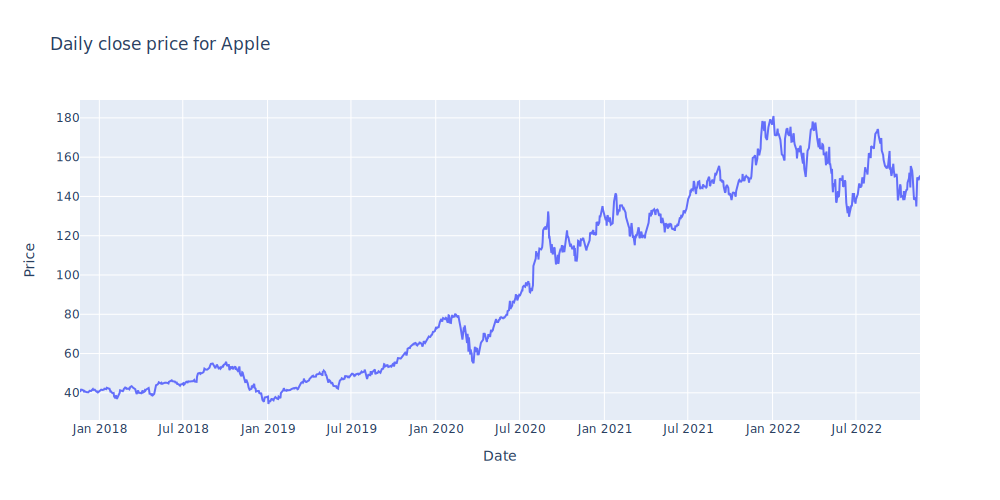

In [6]:
# We choose the Daily Close price of Apple stock as our dataset
# Plot the dataset against time
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=hist.index,y=hist['Close'], mode='lines'))
fig.update_layout(height=500, width=1000, title_text="Daily close price for Apple", xaxis_title="Date", yaxis_title="Price",)
fig.show('svg')


In [7]:
# Total number of dates in the dataset
len(hist['Close'])

1258

In [8]:
# Display only the Daily Close price
df1 = hist['Close']
df1

Date
2017-11-20 00:00:00-05:00     40.408478
2017-11-21 00:00:00-05:00     41.159695
2017-11-22 00:00:00-05:00     41.592354
2017-11-24 00:00:00-05:00     41.594730
2017-11-27 00:00:00-05:00     41.385540
                                ...    
2022-11-11 00:00:00-05:00    149.699997
2022-11-14 00:00:00-05:00    148.279999
2022-11-15 00:00:00-05:00    150.039993
2022-11-16 00:00:00-05:00    148.789993
2022-11-17 00:00:00-05:00    150.720001
Name: Close, Length: 1258, dtype: float64

In [9]:
# normalising the dataset to values bewtween 0 and 1 using MinMaxScaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
df1 = scalar.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
# Display the normalised dataset
df1

array([[0.04158804],
       [0.04671055],
       [0.04966083],
       ...,
       [0.78915985],
       [0.78063616],
       [0.79379679]])

In [11]:
# splitting dataset into training and testing data in a ratio of 0.8 and 0.2 respectively
training_size = int(len(df1)*0.8)

test_size = len(df1) - training_size

train_data, test_data = df1[0:training_size,:], df1[training_size:,:]  # the first 1006 days for training
                                                                       # the next 252 days for testing
print(len(train_data))
print(len(test_data))

1006
252


In [12]:
print(train_data.shape)
print(test_data.shape)

(1006, 1)
(252, 1)


In [13]:
# Define the Dataset Class
class StockDataset(Dataset):
    def __init__(self,data,seq_len = 10):  # the sequence length is 10
        self.data = data
        self.data = torch.from_numpy(data).float().view(-1) # change to float and flatten the tensor
        self.seq_len = seq_len
        
    def __len__(self):
        return len(self.data)-self.seq_len-1

    def __getitem__(self, index) :
        return  self.data[index : index + self.seq_len] , self.data[index + self.seq_len]  # Pair up the input data and the label data




In [14]:
# Create the training and testing dataset
train_dataset = StockDataset(train_data) 
test_dataset = StockDataset(test_data) 

batch_size = 20   # The batch size is 20
train_dataloader = DataLoader(train_dataset,batch_size,drop_last=True)  # Drop the last remaining data if smaller than batch size
test_dataloader = DataLoader(test_dataset,batch_size,drop_last=True)    # Drop the last remaining data if smaller than batch size

device = "cuda" if torch.cuda.is_available() else "cpu"


# Compare LSTM, GRU, Vanilla RNN Model and Statistcal Model (Experiment 1)
### The order of display is LSTM, GRU, Vanilla RNN Model, Statistcal Model. But Vanilla RNN Model will be used for general analysis in the paper.

# LSTM Model

In [15]:
class Lstm_model(nn.Module):
    
    def __init__(self, input_dim , hidden_size , num_layers):
        super(Lstm_model, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_dim
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size=input_dim , hidden_size = hidden_size , num_layers= num_layers)  # LSTM layer
        self.fc = nn.Linear(hidden_size,1)

    def forward(self,x,hn,cn):
        out , (hn,cn) = self.lstm(x , (hn,cn))
        final_out = self.fc(out[-1])  # select output of the last time step as fully-connected layer input
        return final_out,hn,cn

    def init(self):   # initialise the hidden state and memory state
        h0 =  torch.zeros(self.num_layers , batch_size , self.hidden_size).to(device)
        c0 =  torch.zeros(self.num_layers , batch_size , self.hidden_size).to(device)
        return h0 , c0


input_dim = 1    # input is the daily close price only
hidden_size = 128   # hidden state size is 128 
num_layers = 2   # 2 stacks of sequence layers

lstm_model = Lstm_model(input_dim , hidden_size , num_layers).to(device)
loss_fn = nn.MSELoss(reduction='mean')  # Loss function is Mean Square Error loss
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=1e-3)   # learning rate = 1e-3, Adam optimizer as default

In [16]:
# Define the training function 
def train(dataloader, model):
    
    loss_list = []

    if model == lstm_model:
        hn , cn = model.init()   # initialise the hidden state and memory state if LSTM model
    elif model == gru_model or rnn_model:
        hn = model.init()        # initialise the hidden state if GRU or RNN model
    
    model.train()
    for batch , item in enumerate(dataloader):  
        x , y = item
        x = x.to(device)
        y = y.to(device)

        if model == lstm_model:   # training for LSTM model
            out , hn , cn = model(x.reshape(10,batch_size,1),hn,cn)   
            loss = loss_fn(out.reshape(batch_size) , y)  
            hn = hn.detach()
            cn = cn.detach()
        elif model == gru_model or rnn_model:  # training for GRU or RNN model
            out , hn = model(x.reshape(10,batch_size,1),hn)   
            loss = loss_fn(out.reshape(batch_size) , y)  
            hn = hn.detach()
        
        optimizer.zero_grad()  # Backpropagation and optimization 
        loss.backward()
        optimizer.step()
        
        if batch == len(dataloader)-1:  
            loss = loss.item()
            loss_list.append(loss)  # store the loss in a list for ploting graph
    
    return loss_list

In [17]:
# Define the testing function
def test(dataloader, model):

    if model == lstm_model:
        hn , cn = model.init()   # initialise the hidden state and memory state if LSTM model
    elif model == gru_model or rnn_model:
        hn = model.init()        # initialise the hidden state if GRU and RNN models

    model.eval()
    for batch , item in enumerate(dataloader):
        x , y = item
        x = x.to(device)
        y = y.to(device)
        
        if model == lstm_model:   # prediction for LSTM model
            out , hn , cn = model(x.reshape(10,batch_size,1),hn,cn)
        elif model == gru_model or rnn_model:    # prediction for GRU or RNN model
            out , hn = model(x.reshape(10,batch_size,1),hn)

        loss = loss_fn(out.reshape(batch_size) , y)
    
    loss = loss.item()

    return loss

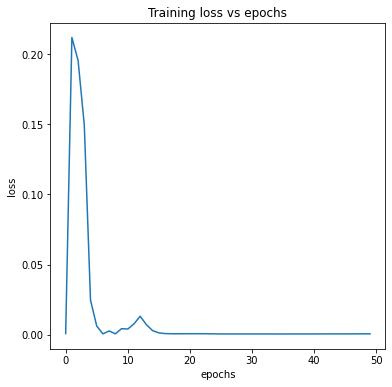

Minimum Training Loss: 0.00039393670158460736

Testing loss: 0.001958798384293914


In [18]:
# Training and testing on lstm_model
epochs = 50
train_loss = []

for epoch in range(epochs):
    loss = train(train_dataloader, lstm_model)
    train_loss.extend(loss)

# Plot the training loss
fig, ax = plt.subplots(1,1,figsize=[6,6])
ax.plot([i for i in range(len(train_loss))], train_loss)
ax.set_title('Training loss vs epochs')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
plt.show()

print('Minimum Training Loss:', min(train_loss))
print()
test_loss = test(test_dataloader, lstm_model)
print('Testing loss:', test_loss)

In [19]:
# Define a function to compare prediction with actual value 
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def calculate_metrics(data_loader, model):
    pred_arr = []
    y_arr = []
    with torch.no_grad():

        if model == lstm_model:
            hn , cn = model.init()  
        elif model == gru_model or rnn_model:
            hn = model.init()

        for batch , item in enumerate(data_loader):
            x , y = item
            x , y = x.to(device) , y.to(device)
            x = x.view(10,20,1)

            if model == lstm_model:
                pred = model(x,hn,cn)[0]
            elif model == gru_model or rnn_model:
                pred = model(x,hn)[0]

            pred = scalar.inverse_transform(pred.detach().cpu().numpy()).reshape(-1)  # tranform from normalise back to original numbers
            y = scalar.inverse_transform(y.detach().cpu().numpy().reshape(1,-1)).reshape(-1)  # tranform from normalise back to original numbers
            pred_arr = pred_arr + list(pred)
            y_arr = y_arr + list(y)

    # Define some parameters for ploting graphs
    if data_loader == train_dataloader:
        n, start, end = 'Training data', 10, 990      # Total 980 days for training data, the last 16 days were droped due to smaller than batch size of 20
    elif data_loader == test_dataloader:
        n, start, end = 'Testing data', 1016, 1256    # Total 240 days for testing data, the last 2 days were droped due to smaller than batch size of 20

    if model == lstm_model:
        m = '(LSTM model)'
    elif model == gru_model:
        m = '(GRU model)'
    elif model == rnn_model:
        m = '(RNN model)'
    
    # Calculate the mean absolute error between the prediction and actual value
    print(f'{m} {n} mean absolute error: ', mean_absolute_error(y_arr,pred_arr))

    # Ploting Actual Price and Predicted Price for training and testing data for different models
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(go.Scatter(x=hist.index[start:end],y=y_arr, mode='lines', name="Actual Price"))
    fig.add_trace(go.Scatter(x=hist.index[start:end],y=pred_arr, mode='lines', name="Predicted Price"))
    fig.update_layout(height=500, width=1000, title_text=f"Daily close price for Apple - {n} {m}", xaxis_title="Date", yaxis_title="Price",)
    fig.show('svg')
    

(LSTM model) Training data mean absolute error:  5.397543


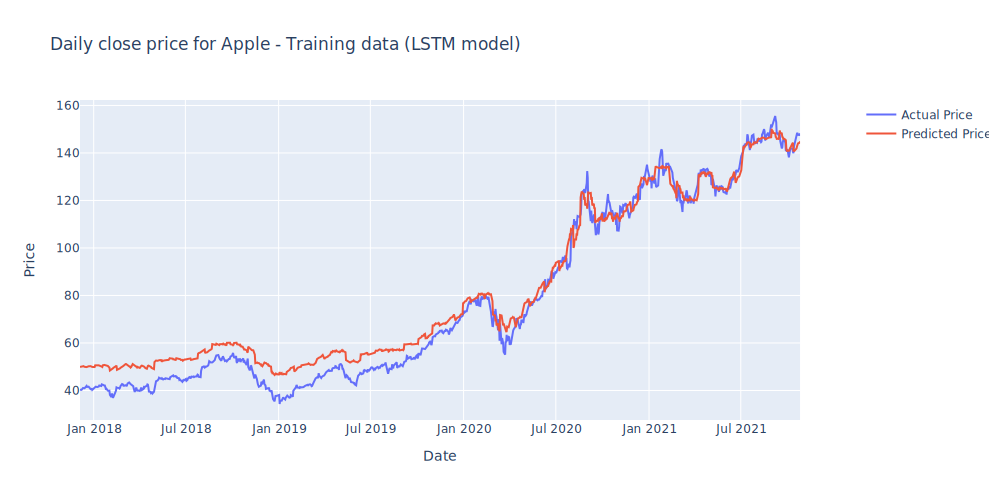

In [20]:
# Compare training data prediction with actual value (LSTM Model)
calculate_metrics(train_dataloader, lstm_model)

(LSTM model) Testing data mean absolute error:  5.1946936


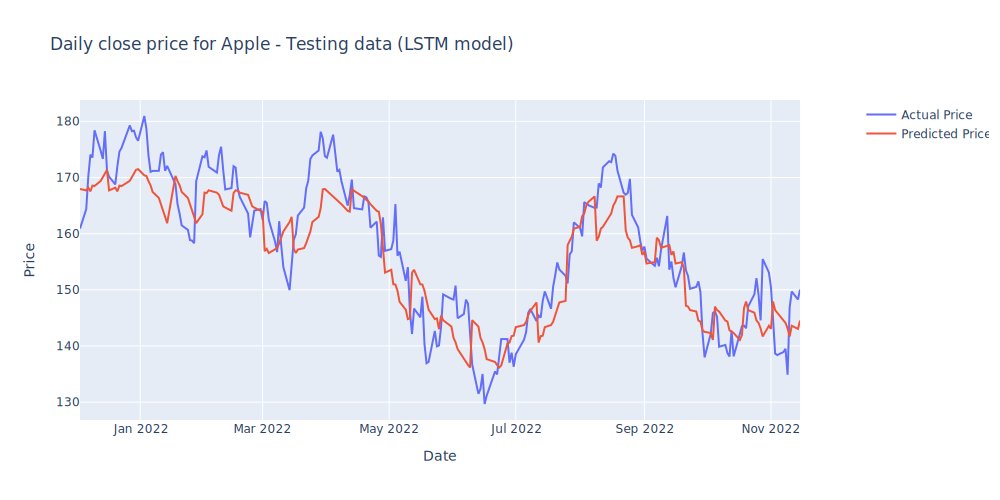

In [21]:
# Compare testing data prediction with actual value (LSTM Model)
calculate_metrics(test_dataloader, lstm_model)

# GRU Model

In [22]:
class GRU_model(nn.Module):
    
    def __init__(self, input_dim , hidden_size , num_layers):
        super(GRU_model, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_dim
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size=input_dim , hidden_size = hidden_size , num_layers= num_layers)
        self.fc = nn.Linear(hidden_size,1)

    def forward(self,x,h):
        out, h = self.gru(x, h)
        final_out = self.fc(out[-1])  # select output of the last time step as fully-connected layer input
        return final_out,h

    def init(self):   # initialise the hidden state and memory state
        h0 =  torch.zeros(self.num_layers , batch_size , self.hidden_size).to(device)
        return h0 


input_dim = 1 
hidden_size = 128
num_layers = 2

gru_model = GRU_model(input_dim , hidden_size , num_layers).to(device)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(gru_model.parameters(), lr=1e-3)   # learning rate = 1e-3, Adam optimizer as default

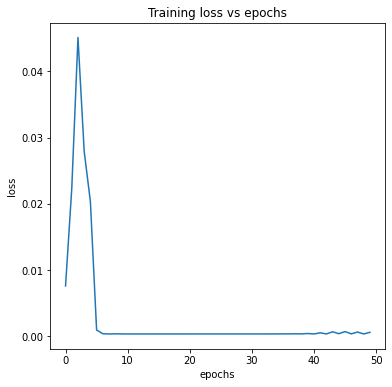

Minimum Training Loss: 0.0003739948442671448

Testing loss: 0.0019725847523659468


In [23]:
# Training and testing on gru_model
epochs = 50
train_loss = []

for epoch in range(epochs):
    loss = train(train_dataloader, gru_model)
    train_loss.extend(loss)

# Plot the training loss
fig, ax = plt.subplots(1,1,figsize=[6,6])
ax.plot([i for i in range(len(train_loss))], train_loss)
ax.set_title('Training loss vs epochs')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
plt.show()

print('Minimum Training Loss:', min(train_loss))
print()
test_loss = test(test_dataloader, gru_model)
print('Testing loss:', test_loss)

(GRU model) Training data mean absolute error:  3.3635573


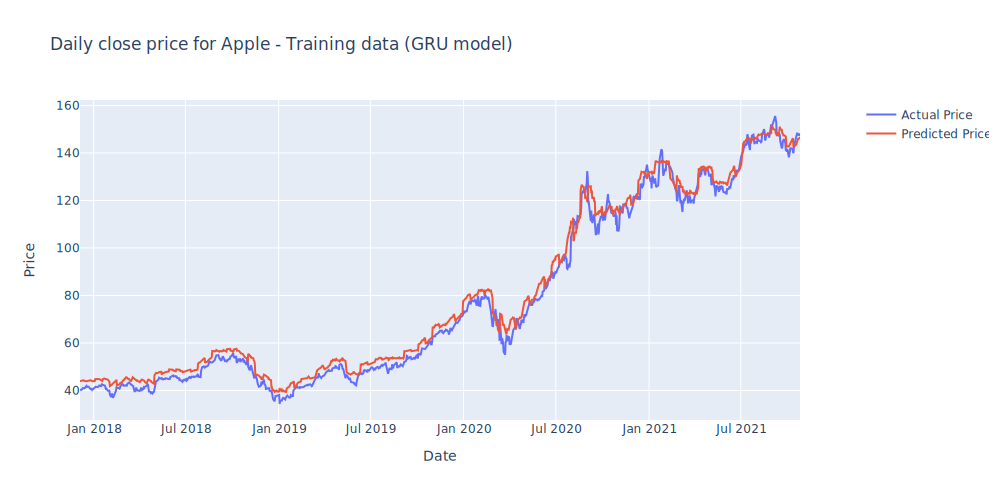

In [24]:
# Compare training data prediction with actual value (GRU Model)
calculate_metrics(train_dataloader, gru_model)

(GRU model) Testing data mean absolute error:  4.944982


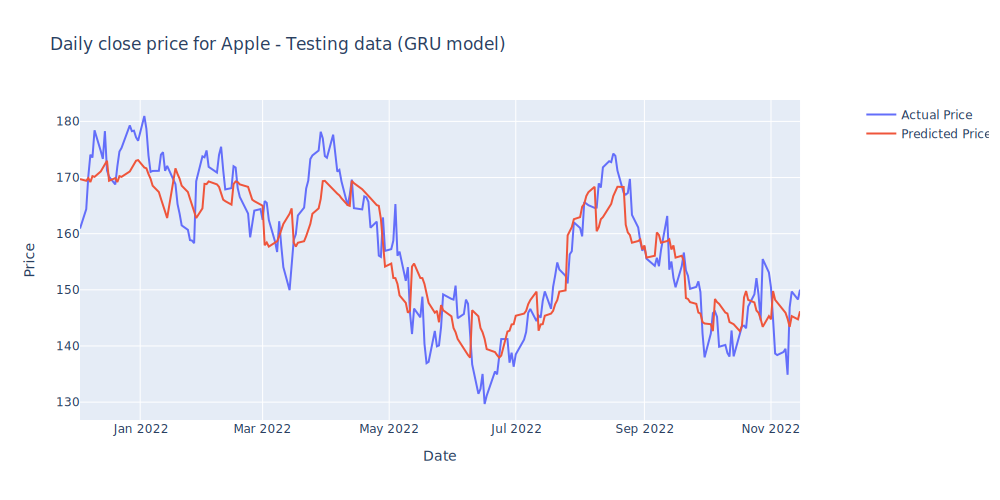

In [25]:
# Compare testing data prediction with actual value (GRU Model)
calculate_metrics(test_dataloader, gru_model)

# Vanilla RNN Model

In [26]:
class RNN_model(nn.Module):
    
    def __init__(self, input_dim , hidden_size , num_layers):
        super(RNN_model, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_dim
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size=input_dim , hidden_size = hidden_size , num_layers= num_layers)
        self.fc = nn.Linear(hidden_size,1)

    def forward(self,x,h):
        out, h = self.rnn(x, h)
        final_out = self.fc(out[-1])  # select output of the last time step as fully-connected layer input
        return final_out,h

    def init(self):   # initialise the hidden state and memory state
        h0 =  torch.zeros(self.num_layers , batch_size , self.hidden_size).to(device)
        return h0 


input_dim = 1 
hidden_size = 128
num_layers = 2

rnn_model = RNN_model(input_dim , hidden_size , num_layers).to(device)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=1e-3)   # learning rate = 1e-3, Adam optimizer as default

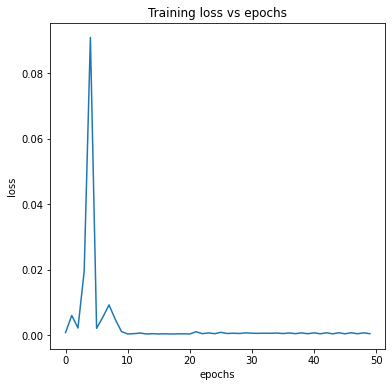

Minimum Training Loss: 0.00036732127773575485

Testing loss: 0.0020757417660206556


In [27]:
# Training and testing on rnn_model
epochs = 50
train_loss = []

for epoch in range(epochs):
    loss = train(train_dataloader, rnn_model)
    train_loss.extend(loss)

# Plot the training loss
fig, ax = plt.subplots(1,1,figsize=[6,6])
ax.plot([i for i in range(len(train_loss))], train_loss)
ax.set_title('Training loss vs epochs')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
plt.show()

print('Minimum Training Loss:', min(train_loss))
print()
test_loss = test(test_dataloader, rnn_model)
print('Testing loss:', test_loss)

(RNN model) Training data mean absolute error:  4.541469


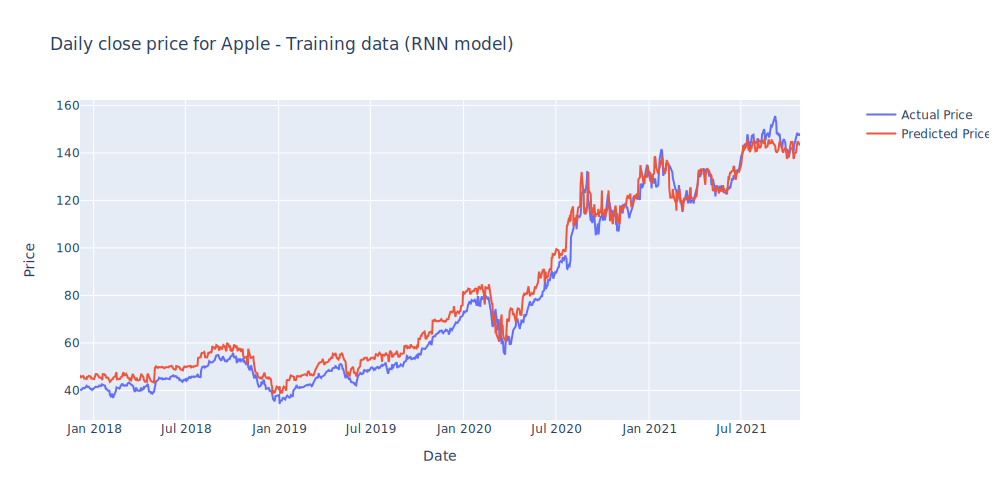

In [28]:
# Compare training data prediction with actual value (RNN Model)
calculate_metrics(train_dataloader, rnn_model)

(RNN model) Testing data mean absolute error:  8.464079


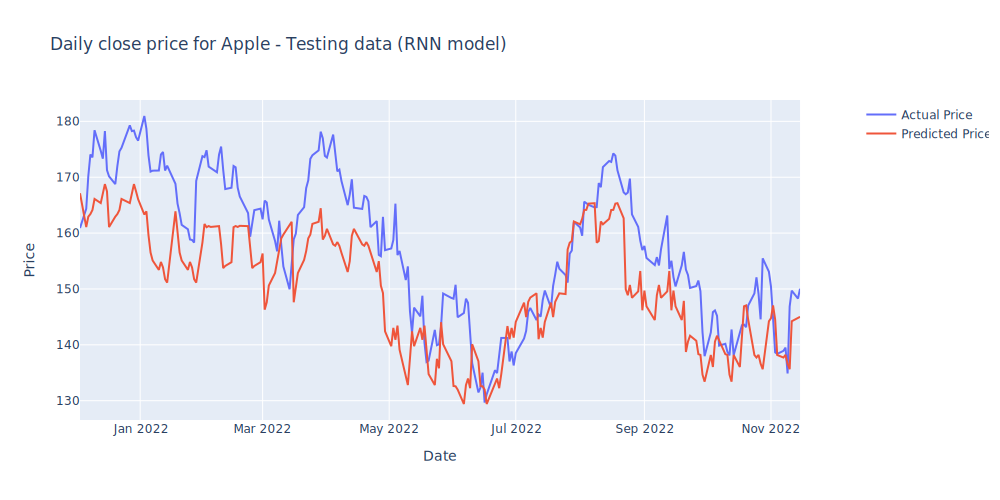

In [29]:
# Compare testing data prediction with actual value (RNN Model)
calculate_metrics(test_dataloader, rnn_model)

# Statistcal Model

# Simple Moving Average (30 days moving average)

In [30]:
hist['Close']

Date
2017-11-20 00:00:00-05:00     40.408478
2017-11-21 00:00:00-05:00     41.159695
2017-11-22 00:00:00-05:00     41.592354
2017-11-24 00:00:00-05:00     41.594730
2017-11-27 00:00:00-05:00     41.385540
                                ...    
2022-11-11 00:00:00-05:00    149.699997
2022-11-14 00:00:00-05:00    148.279999
2022-11-15 00:00:00-05:00    150.039993
2022-11-16 00:00:00-05:00    148.789993
2022-11-17 00:00:00-05:00    150.720001
Name: Close, Length: 1258, dtype: float64

In [31]:
# Simple Moving Average in the training data period
hist_mean_stat = hist['Close'].rolling(30).mean()
y_stat_train = list(hist_mean_stat)[30:990]
y_true_train = list(hist['Close'][30:990])

In [32]:
# Calculate the mean absolute error between the prediction and actual value
print('mean absolute error: ', mean_absolute_error(y_true_train,y_stat_train))

# Ploting Actual Price and Predicted Price for training data
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=hist.index[30:990],y=y_true_train, mode='lines', name="Actual Price"))
fig.add_trace(go.Scatter(x=hist.index[30:990],y=y_stat_train, mode='lines', name="Predicted Price"))
fig.update_layout(height=500, width=1200, title_text=f"Daily close price for Apple - Simple Moving Average (Training data period)", xaxis_title="Date", yaxis_title="Price",)
fig.show()

mean absolute error:  3.922784856690301


In [33]:
# # Simple Moving Average in the testing data period
hist_mean_stat = hist['Close'].rolling(30).mean()
y_stat_test = list(hist_mean_stat)[1016:1256]
y_true_test = list(hist['Close'][1016:1256])

In [34]:
# Calculate the mean absolute error between the prediction and actual value
print('mean absolute error: ', mean_absolute_error(y_true_test,y_stat_test))

# Ploting Actual Price and Predicted Price for testing data
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=hist.index[1016:1256],y=y_true_test, mode='lines', name="Actual Price"))
fig.add_trace(go.Scatter(x=hist.index[1016:1256],y=y_stat_test, mode='lines', name="Predicted Price"))
fig.update_layout(height=500, width=1200, title_text=f"Daily close price for Apple - Simple Moving Average (Testing data period)", xaxis_title="Date", yaxis_title="Price",)
fig.show()

mean absolute error:  8.03115837732951


# Use different Optimizers on GRU Model (Experiment 2)
### Since GRU Model gives the best performance, we implement different optimizers on GRU model. The GRU model in experiment 1 uses Adam optimizer. Next, we will use SGD with momentum and RMSprop optimizers in experiment 2.

# GRU Model using SGD with momentum optimizer

In [35]:
class GRU_model(nn.Module):
    
    def __init__(self, input_dim , hidden_size , num_layers):
        super(GRU_model, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_dim
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size=input_dim , hidden_size = hidden_size , num_layers= num_layers)
        self.fc = nn.Linear(hidden_size,1)

    def forward(self,x,h):
        out, h = self.gru(x, h)
        final_out = self.fc(out[-1])  # select output of the last time step as fully-connected layer input
        return final_out,h

    def init(self):   # initialise the hidden state and memory state
        h0 =  torch.zeros(self.num_layers , batch_size , self.hidden_size).to(device)
        return h0 


input_dim = 1 
hidden_size = 128
num_layers = 2

gru_model = GRU_model(input_dim , hidden_size , num_layers).to(device)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(gru_model.parameters(), lr=1e-3, momentum=0.8)  # momentum factor set as 0.8

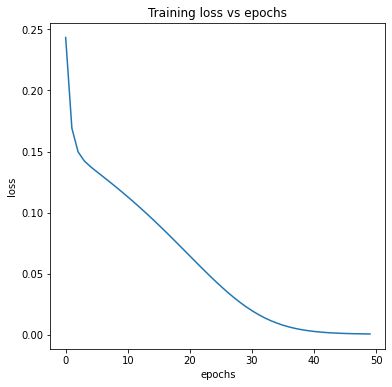

Minimum Training Loss: 0.0006479130825027823

Testing loss: 0.002064728643745184


In [36]:
# Training and testing on gru_model
epochs = 50
train_loss = []

for epoch in range(epochs):
    loss = train(train_dataloader, gru_model)
    train_loss.extend(loss)

# Plot the training loss
fig, ax = plt.subplots(1,1,figsize=[6,6])
ax.plot([i for i in range(len(train_loss))], train_loss)
ax.set_title('Training loss vs epochs')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
plt.show()

print('Minimum Training Loss:', min(train_loss))
print()
test_loss = test(test_dataloader, gru_model)
print('Testing loss:', test_loss)

(GRU model) Training data mean absolute error:  2.876545


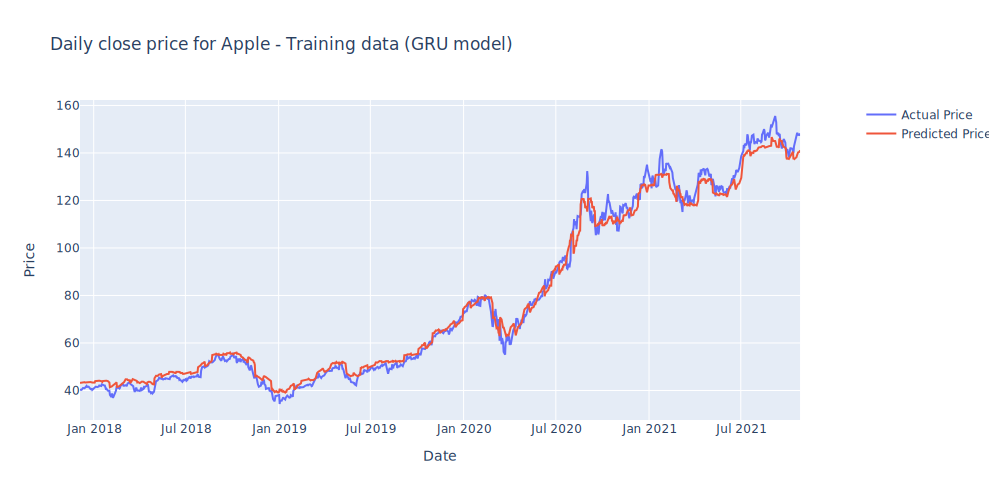

In [37]:
# SGD with momentum optimizer
calculate_metrics(train_dataloader, gru_model)

(GRU model) Testing data mean absolute error:  6.6575766


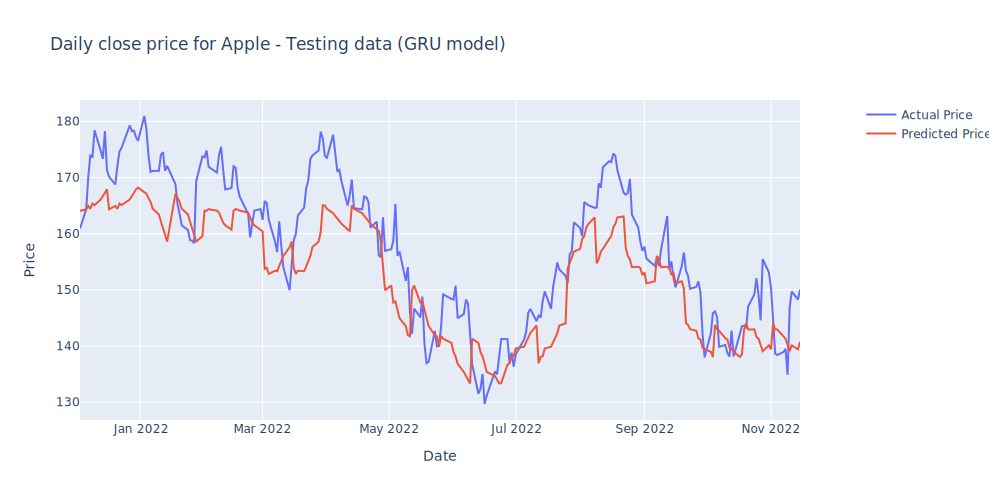

In [38]:
# SGD with momentum optimizer
calculate_metrics(test_dataloader, gru_model)

# GRU with RMSprop optimizer

In [39]:
class GRU_model(nn.Module):
    
    def __init__(self, input_dim , hidden_size , num_layers):
        super(GRU_model, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_dim
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size=input_dim , hidden_size = hidden_size , num_layers= num_layers)
        self.fc = nn.Linear(hidden_size,1)

    def forward(self,x,h):
        out, h = self.gru(x, h)
        final_out = self.fc(out[-1])  # select output of the last time step as fully-connected layer input
        return final_out,h

    def init(self):   # initialise the hidden state and memory state
        h0 =  torch.zeros(self.num_layers , batch_size , self.hidden_size).to(device)
        return h0 


input_dim = 1 
hidden_size = 128
num_layers = 2

gru_model = GRU_model(input_dim , hidden_size , num_layers).to(device)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = torch.optim.RMSprop(gru_model.parameters(), lr=1e-3, momentum=0.8)

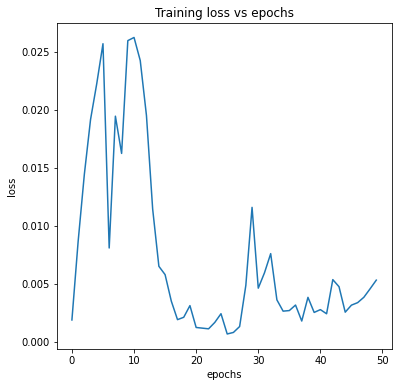

Minimum Training Loss: 0.0006622934597544372

Testing loss: 0.002333874348551035


In [40]:
# Training and testing on gru_model
epochs = 50
train_loss = []

for epoch in range(epochs):
    loss = train(train_dataloader, gru_model)
    train_loss.extend(loss)

# Plot the training loss
fig, ax = plt.subplots(1,1,figsize=[6,6])
ax.plot([i for i in range(len(train_loss))], train_loss)
ax.set_title('Training loss vs epochs')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
plt.show()

print('Minimum Training Loss:', min(train_loss))
print()
test_loss = test(test_dataloader, gru_model)
print('Testing loss:', test_loss)

(GRU model) Training data mean absolute error:  7.62792


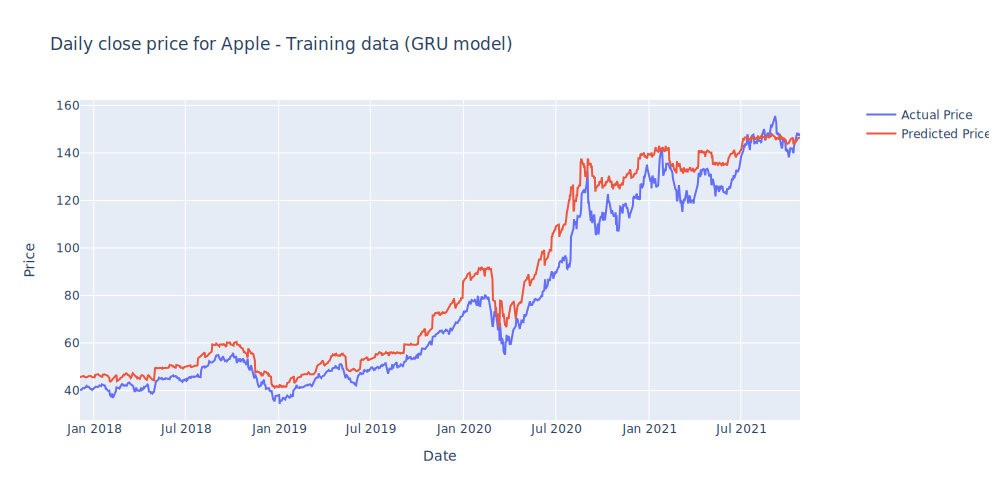

In [41]:
# RMSprop optimizer
calculate_metrics(train_dataloader, gru_model)

(GRU model) Testing data mean absolute error:  10.005298


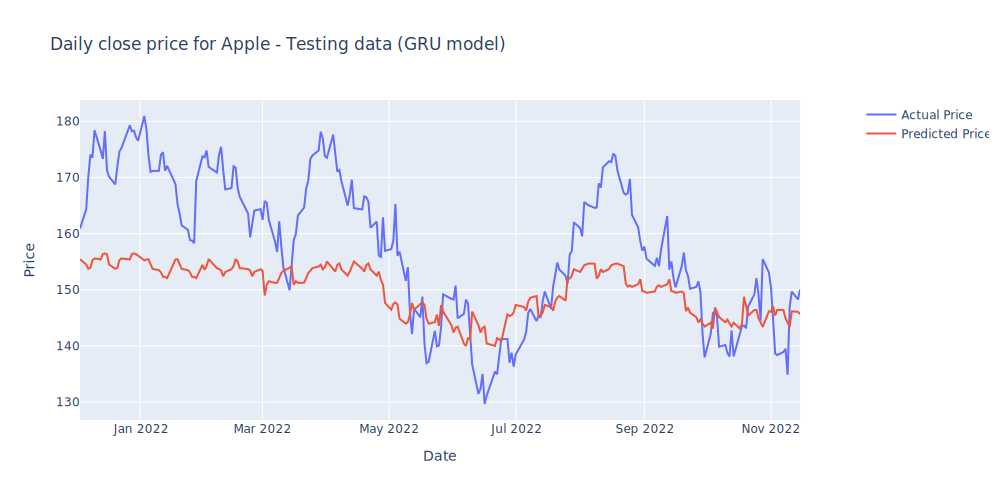

In [42]:
# RMSprop optimizer
calculate_metrics(test_dataloader, gru_model)

# Use different learning rate on GRU model (Experiment 3)
### The learning rate starts from large to small. The GRU model in experiment 1 uses learning rate of $1 \times 10^{-3}$ and is not repeatedly display here.

# GRU (learning rate = $5 \times 10^{-3}$)

In [43]:
class GRU_model(nn.Module):
    
    def __init__(self, input_dim , hidden_size , num_layers):
        super(GRU_model, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_dim
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size=input_dim , hidden_size = hidden_size , num_layers= num_layers)
        self.fc = nn.Linear(hidden_size,1)

    def forward(self,x,h):
        out, h = self.gru(x, h)
        final_out = self.fc(out[-1])  # select output of the last time step as fully-connected layer input
        return final_out,h

    def init(self):   # initialise the hidden state and memory state
        h0 =  torch.zeros(self.num_layers , batch_size , self.hidden_size).to(device)
        return h0 


input_dim = 1 
hidden_size = 128
num_layers = 2

gru_model = GRU_model(input_dim , hidden_size , num_layers).to(device)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(gru_model.parameters(), lr=5e-3)

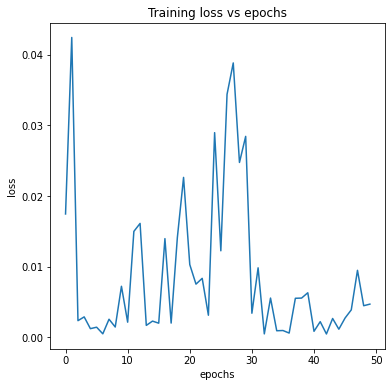

Minimum Training Loss: 0.0004810960090253502

Testing loss: 0.00856971088796854


In [44]:
# Training and testing on gru_model
epochs = 50
train_loss = []

for epoch in range(epochs):
    loss = train(train_dataloader, gru_model)
    train_loss.extend(loss)

# Plot the training loss
fig, ax = plt.subplots(1,1,figsize=[6,6])
ax.plot([i for i in range(len(train_loss))], train_loss)
ax.set_title('Training loss vs epochs')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
plt.show()

print('Minimum Training Loss:', min(train_loss))
print()
test_loss = test(test_dataloader, gru_model)
print('Testing loss:', test_loss)

(GRU model) Training data mean absolute error:  16.434818


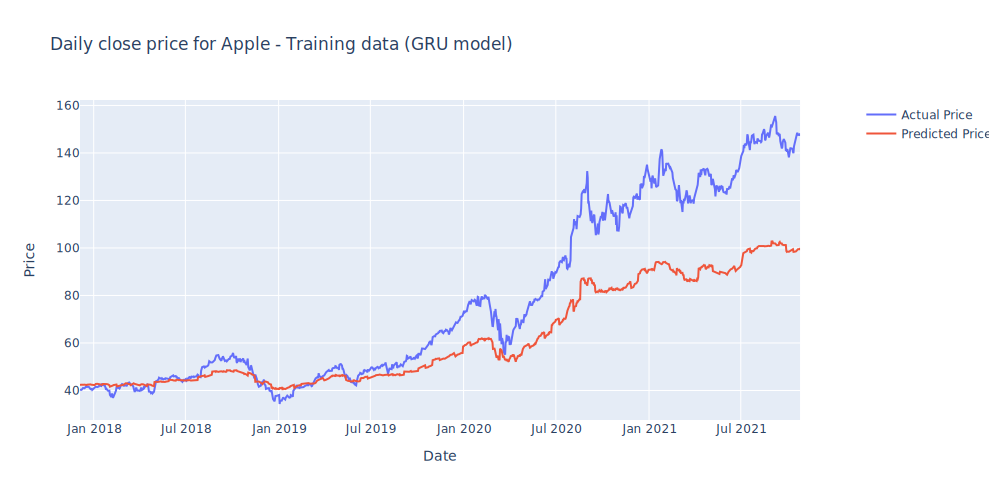

In [45]:
# Compare training data prediction with actual value (GRU Model)
calculate_metrics(train_dataloader, gru_model)

(GRU model) Testing data mean absolute error:  51.314575


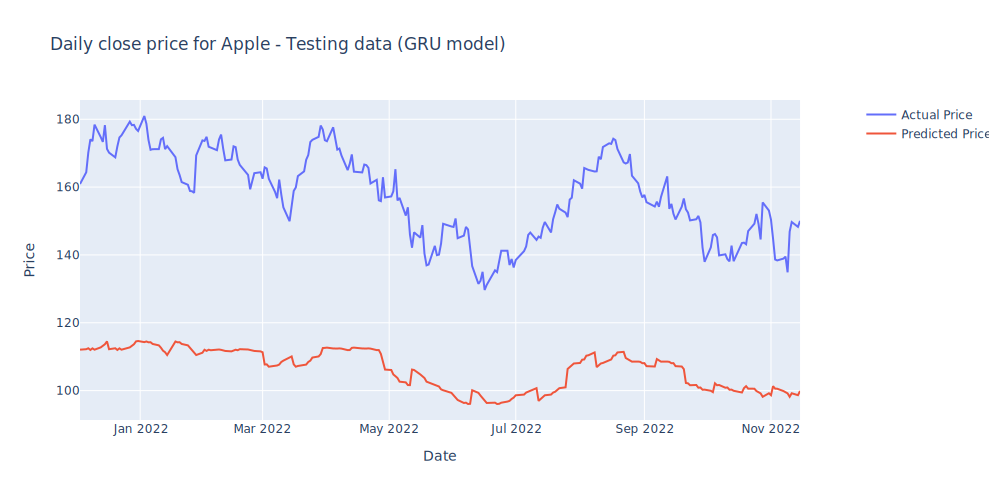

In [46]:
# Compare testing data prediction with actual value (GRU Model)
calculate_metrics(test_dataloader, gru_model)

# GRU (learning rate = $5 \times 10^{-4}$)

In [47]:
class GRU_model(nn.Module):
    
    def __init__(self, input_dim , hidden_size , num_layers):
        super(GRU_model, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_dim
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size=input_dim , hidden_size = hidden_size , num_layers= num_layers)
        self.fc = nn.Linear(hidden_size,1)

    def forward(self,x,h):
        out, h = self.gru(x, h)
        final_out = self.fc(out[-1])  # select output of the last time step as fully-connected layer input
        return final_out,h

    def init(self):   # initialise the hidden state and memory state
        h0 =  torch.zeros(self.num_layers , batch_size , self.hidden_size).to(device)
        return h0 


input_dim = 1 
hidden_size = 128
num_layers = 2

gru_model = GRU_model(input_dim , hidden_size , num_layers).to(device)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(gru_model.parameters(), lr=5e-4)

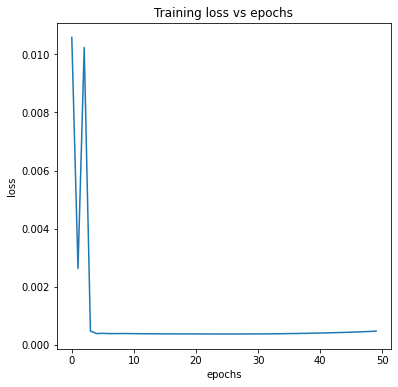

Minimum Training Loss: 0.0003763038548640907

Testing loss: 0.001968507654964924


In [48]:
# Training and testing on gru_model
epochs = 50
train_loss = []

for epoch in range(epochs):
    loss = train(train_dataloader, gru_model)
    train_loss.extend(loss)

# Plot the training loss
fig, ax = plt.subplots(1,1,figsize=[6,6])
ax.plot([i for i in range(len(train_loss))], train_loss)
ax.set_title('Training loss vs epochs')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
plt.show()

print('Minimum Training Loss:', min(train_loss))
print()
test_loss = test(test_dataloader, gru_model)
print('Testing loss:', test_loss)

(GRU model) Training data mean absolute error:  2.6708019


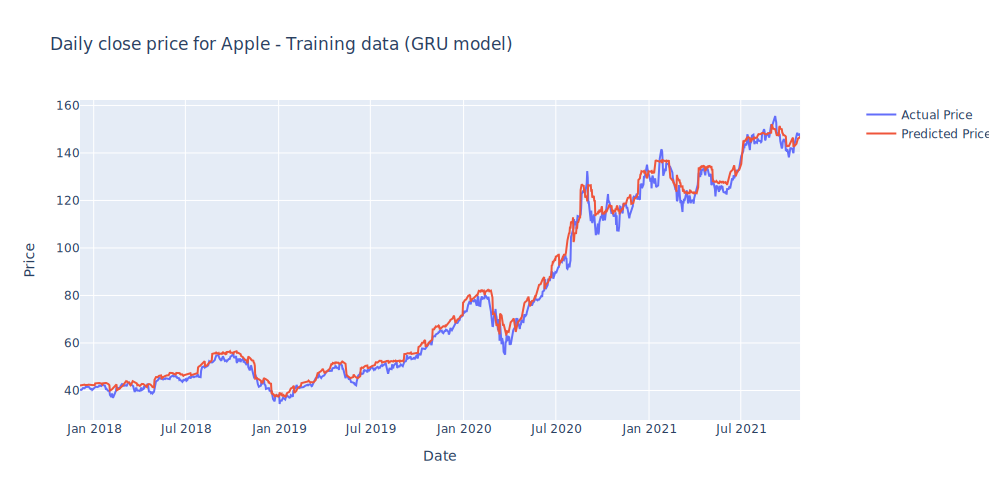

In [49]:
# Compare training data prediction with actual value (GRU Model)
calculate_metrics(train_dataloader, gru_model)

(GRU model) Testing data mean absolute error:  4.933486


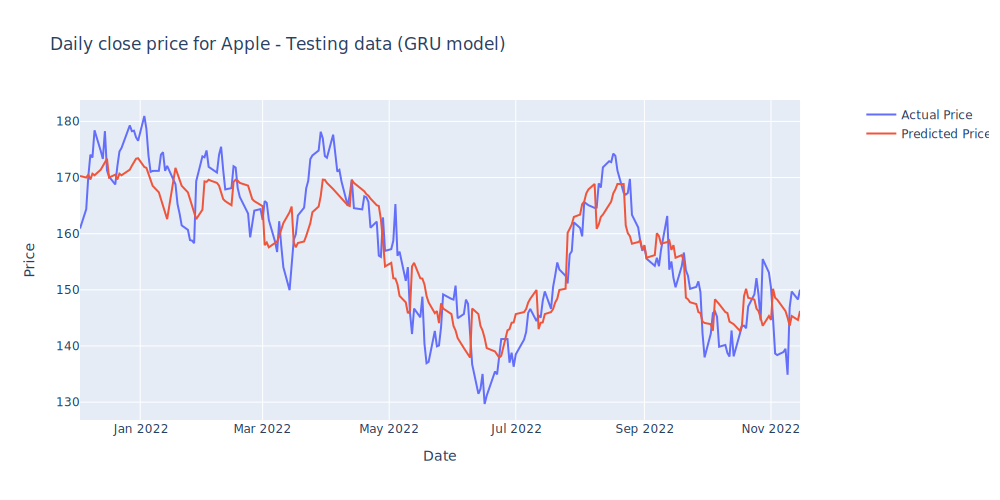

In [50]:
# Compare testing data prediction with actual value (GRU Model)
calculate_metrics(test_dataloader, gru_model)

# GRU (learning rate = $1 \times 10^{-4}$)

In [51]:
class GRU_model(nn.Module):
    
    def __init__(self, input_dim , hidden_size , num_layers):
        super(GRU_model, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_dim
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size=input_dim , hidden_size = hidden_size , num_layers= num_layers)
        self.fc = nn.Linear(hidden_size,1)

    def forward(self,x,h):
        out, h = self.gru(x, h)
        final_out = self.fc(out[-1])  # select output of the last time step as fully-connected layer input
        return final_out,h

    def init(self):   # initialise the hidden state and memory state
        h0 =  torch.zeros(self.num_layers , batch_size , self.hidden_size).to(device)
        return h0 


input_dim = 1 
hidden_size = 128
num_layers = 2

gru_model = GRU_model(input_dim , hidden_size , num_layers).to(device)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(gru_model.parameters(), lr=1e-4)

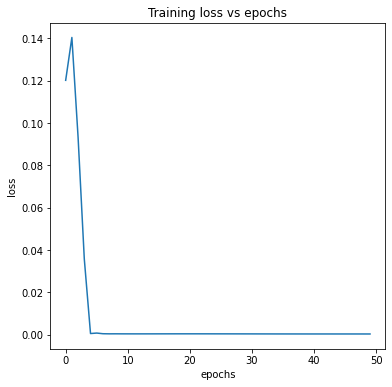

Minimum Training Loss: 0.0003945711941923946

Testing loss: 0.0018668652046471834


In [52]:
# Training and testing on gru_model
epochs = 50
train_loss = []

for epoch in range(epochs):
    loss = train(train_dataloader, gru_model)
    train_loss.extend(loss)

# Plot the training loss
fig, ax = plt.subplots(1,1,figsize=[6,6])
ax.plot([i for i in range(len(train_loss))], train_loss)
ax.set_title('Training loss vs epochs')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
plt.show()

print('Minimum Training Loss:', min(train_loss))
print()
test_loss = test(test_dataloader, gru_model)
print('Testing loss:', test_loss)

(GRU model) Training data mean absolute error:  2.2701569


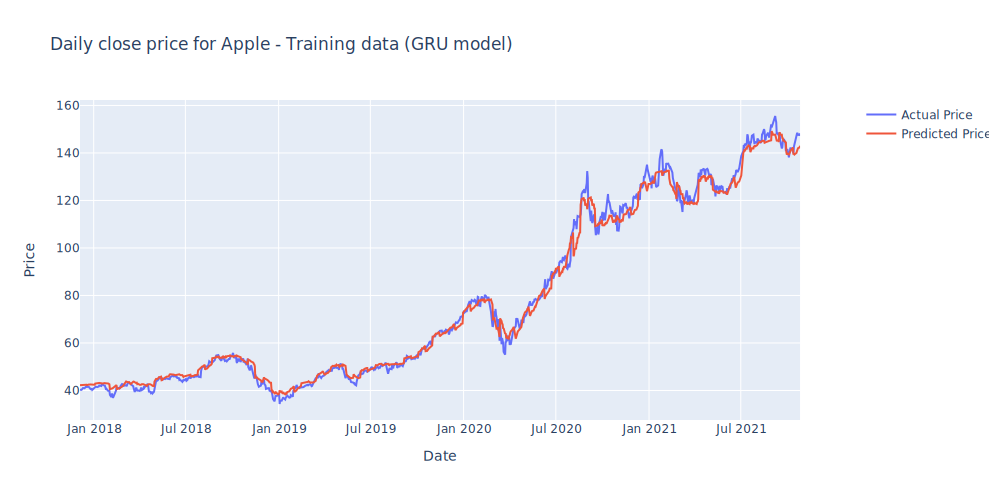

In [53]:
# Compare training data prediction with actual value (GRU Model)
calculate_metrics(train_dataloader, gru_model)

(GRU model) Testing data mean absolute error:  5.187914


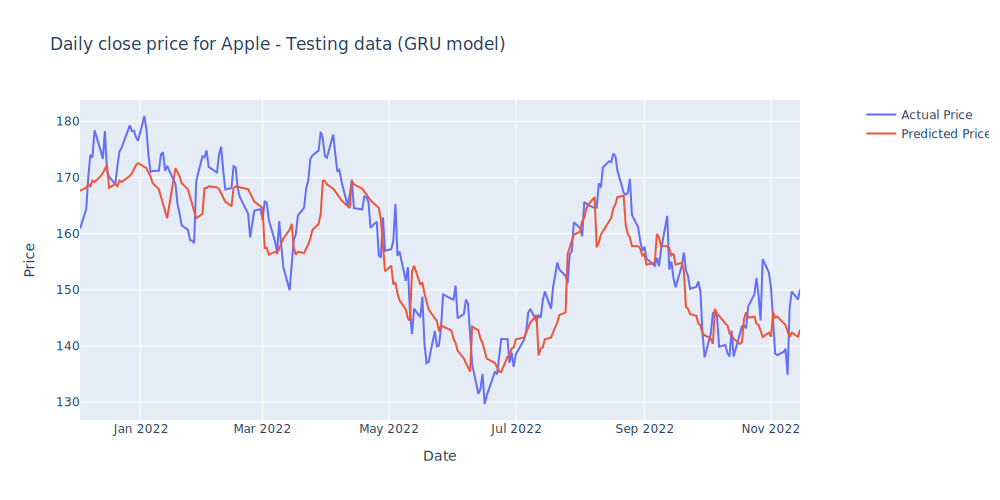

In [54]:
# Compare testing data prediction with actual value (GRU Model)
calculate_metrics(test_dataloader, gru_model)

# GRU (learning rate = $5 \times 10^{-5}$)

In [55]:
class GRU_model(nn.Module):
    
    def __init__(self, input_dim , hidden_size , num_layers):
        super(GRU_model, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_dim
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size=input_dim , hidden_size = hidden_size , num_layers= num_layers)
        self.fc = nn.Linear(hidden_size,1)

    def forward(self,x,h):
        out, h = self.gru(x, h)
        final_out = self.fc(out[-1])  # select output of the last time step as fully-connected layer input
        return final_out,h

    def init(self):   # initialise the hidden state and memory state
        h0 =  torch.zeros(self.num_layers , batch_size , self.hidden_size).to(device)
        return h0 


input_dim = 1 
hidden_size = 128
num_layers = 2

gru_model = GRU_model(input_dim , hidden_size , num_layers).to(device)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(gru_model.parameters(), lr=5e-5)

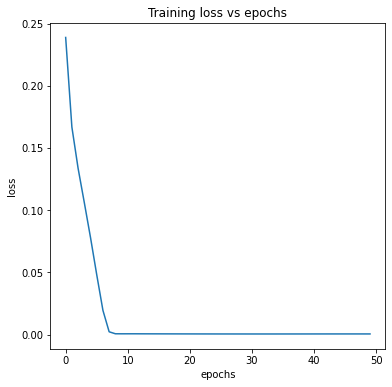

Minimum Training Loss: 0.00043217401253059506

Testing loss: 0.0017388748237863183


In [56]:
# Training and testing on gru_model
epochs = 50
train_loss = []

for epoch in range(epochs):
    loss = train(train_dataloader, gru_model)
    train_loss.extend(loss)

# Plot the training loss
fig, ax = plt.subplots(1,1,figsize=[6,6])
ax.plot([i for i in range(len(train_loss))], train_loss)
ax.set_title('Training loss vs epochs')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
plt.show()

print('Minimum Training Loss:', min(train_loss))
print()
test_loss = test(test_dataloader, gru_model)
print('Testing loss:', test_loss)

(GRU model) Training data mean absolute error:  2.874577


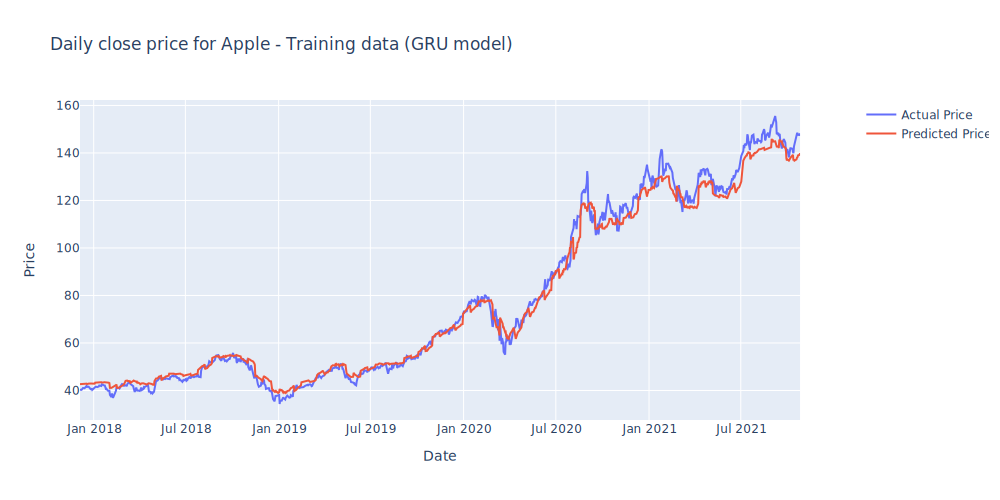

In [57]:
# Compare training data prediction with actual value (GRU Model)
calculate_metrics(train_dataloader, gru_model)

(GRU model) Testing data mean absolute error:  6.8049803


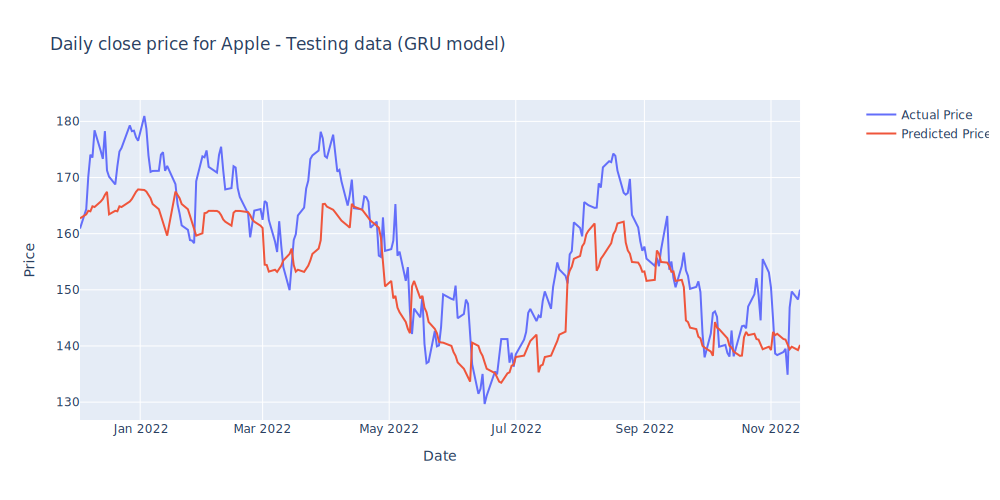

In [58]:
# Compare testing data prediction with actual value (GRU Model)
calculate_metrics(test_dataloader, gru_model)

# GRU (learning rate = $1 \times 10^{-5}$)

In [59]:
class GRU_model(nn.Module):
    
    def __init__(self, input_dim , hidden_size , num_layers):
        super(GRU_model, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_dim
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size=input_dim , hidden_size = hidden_size , num_layers= num_layers)
        self.fc = nn.Linear(hidden_size,1)

    def forward(self,x,h):
        out, h = self.gru(x, h)
        final_out = self.fc(out[-1])  # select output of the last time step as fully-connected layer input
        return final_out,h

    def init(self):   # initialise the hidden state and memory state
        h0 =  torch.zeros(self.num_layers , batch_size , self.hidden_size).to(device)
        return h0 


input_dim = 1 
hidden_size = 128
num_layers = 2

gru_model = GRU_model(input_dim , hidden_size , num_layers).to(device)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(gru_model.parameters(), lr=1e-5)

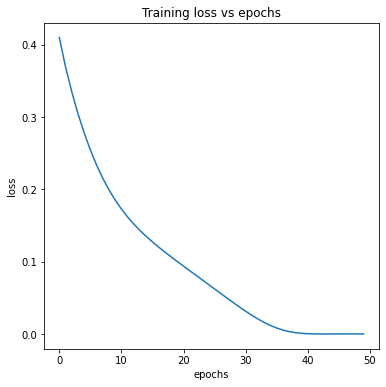

Minimum Training Loss: 0.00047141313552856445

Testing loss: 0.0016834773123264313


In [60]:
# Training and testing on gru_model
epochs = 50
train_loss = []

for epoch in range(epochs):
    loss = train(train_dataloader, gru_model)
    train_loss.extend(loss)

# Plot the training loss
fig, ax = plt.subplots(1,1,figsize=[6,6])
ax.plot([i for i in range(len(train_loss))], train_loss)
ax.set_title('Training loss vs epochs')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
plt.show()

print('Minimum Training Loss:', min(train_loss))
print()
test_loss = test(test_dataloader, gru_model)
print('Testing loss:', test_loss)

(GRU model) Training data mean absolute error:  5.586479


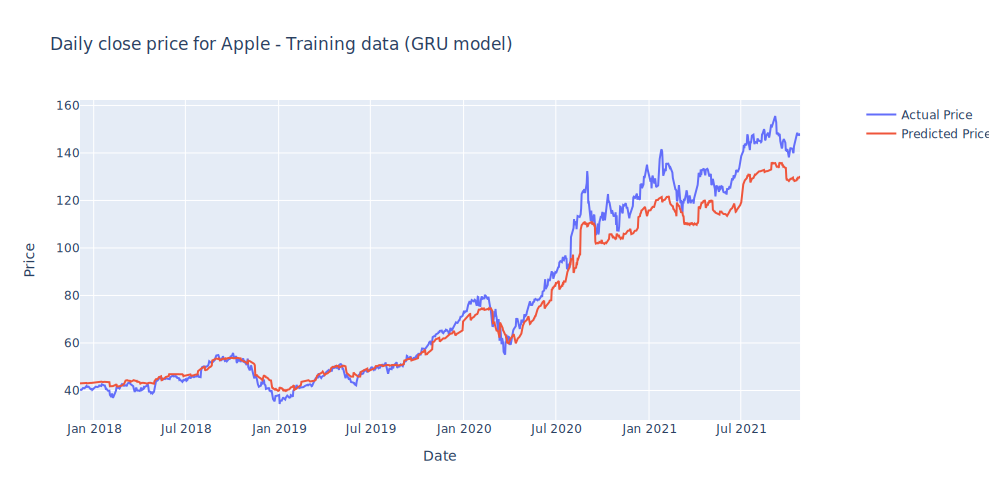

In [61]:
# Compare training data prediction with actual value (GRU Model)
calculate_metrics(train_dataloader, gru_model)

(GRU model) Testing data mean absolute error:  15.0827675


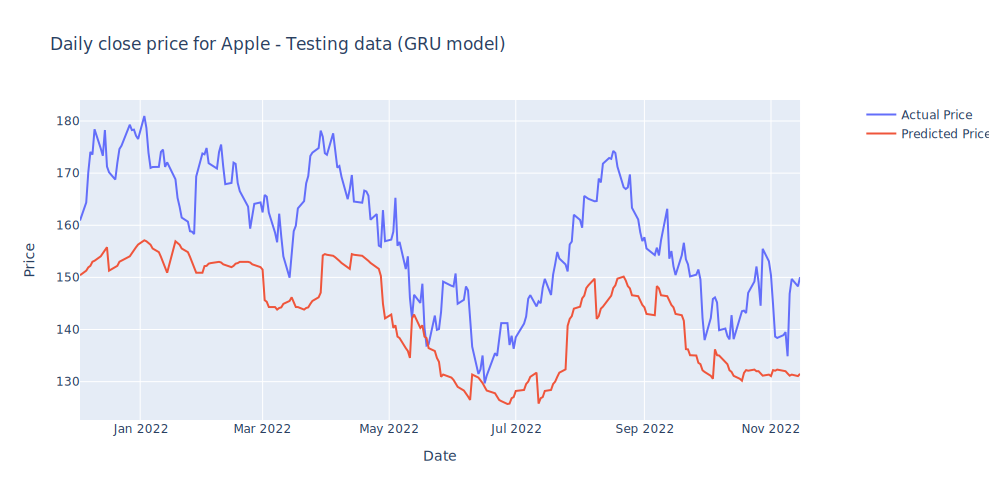

In [62]:
# Compare testing data prediction with actual value (GRU Model)
calculate_metrics(test_dataloader, gru_model)